# Week_1-Probability

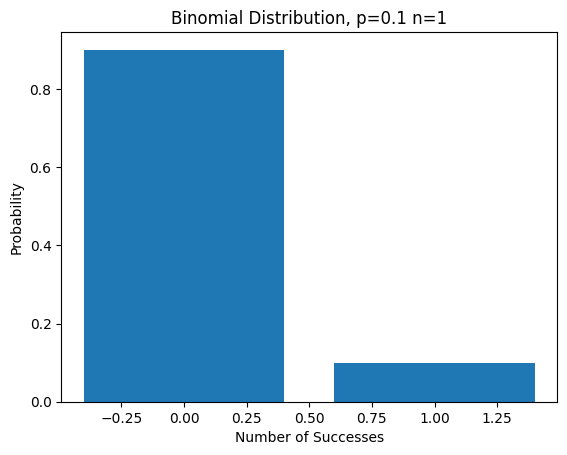

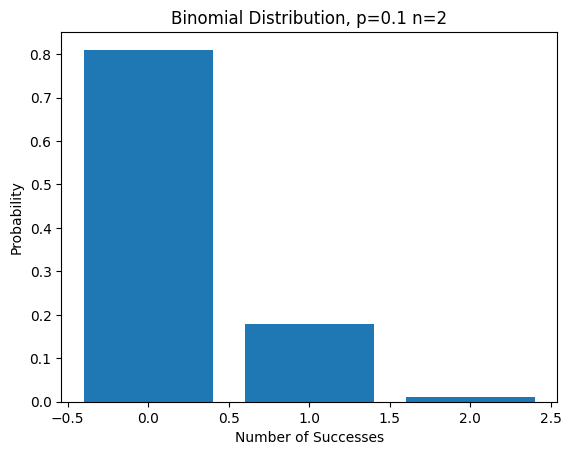

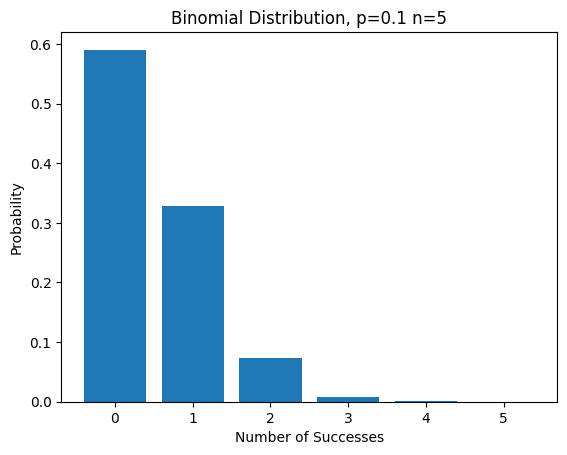

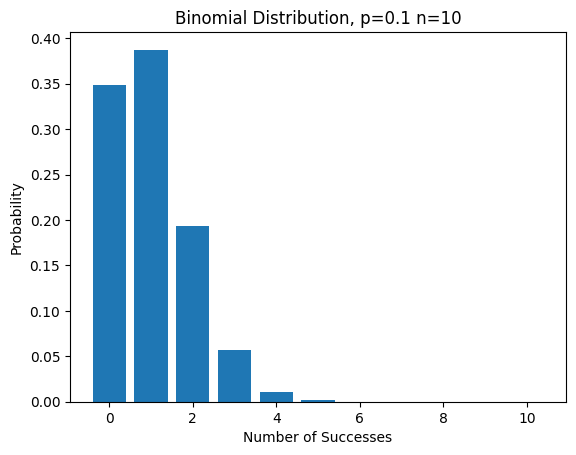

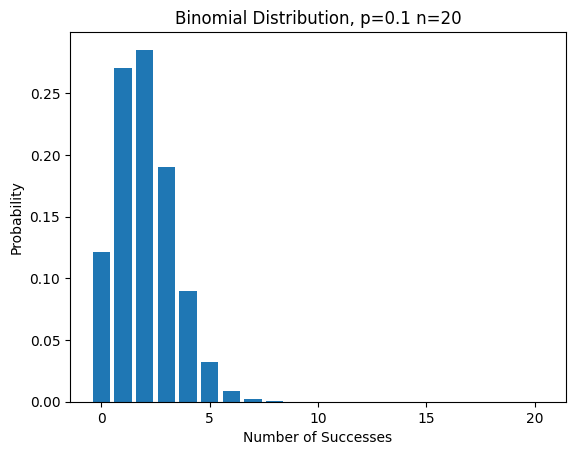

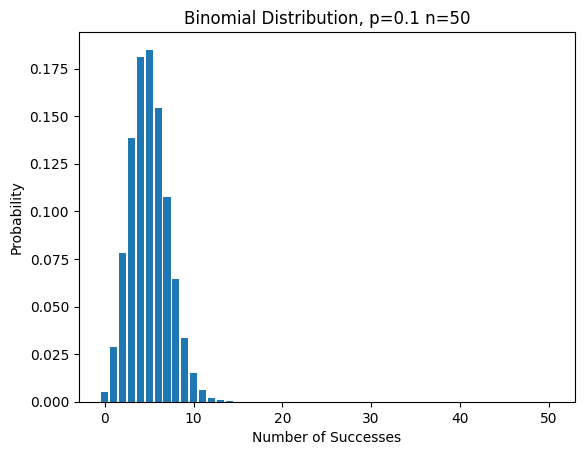

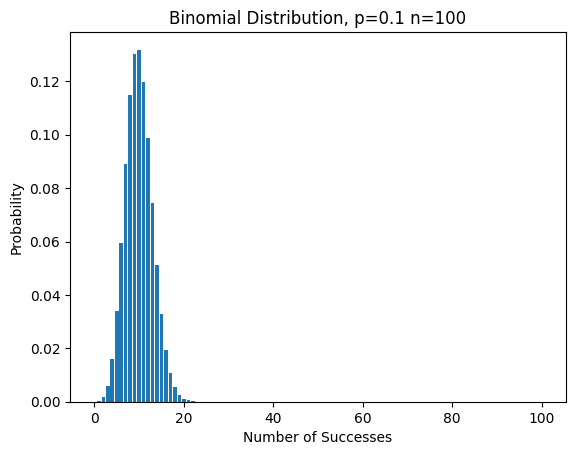

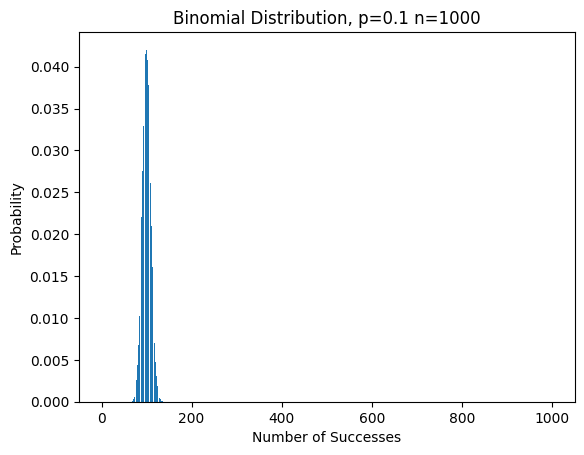

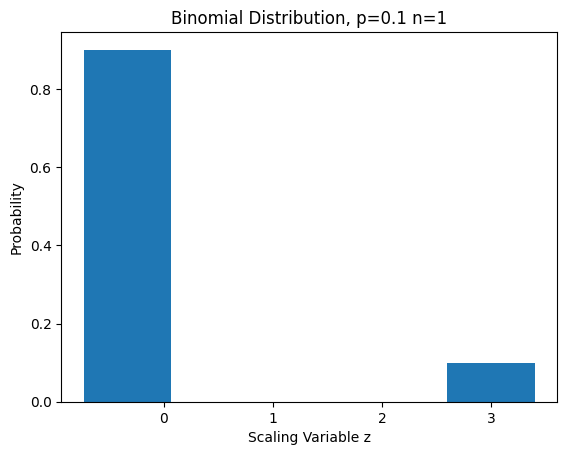

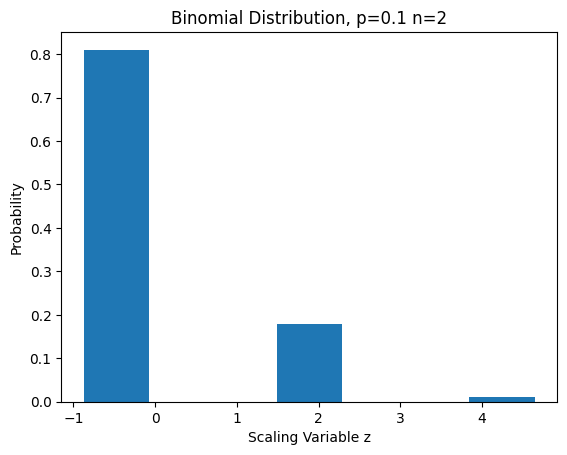

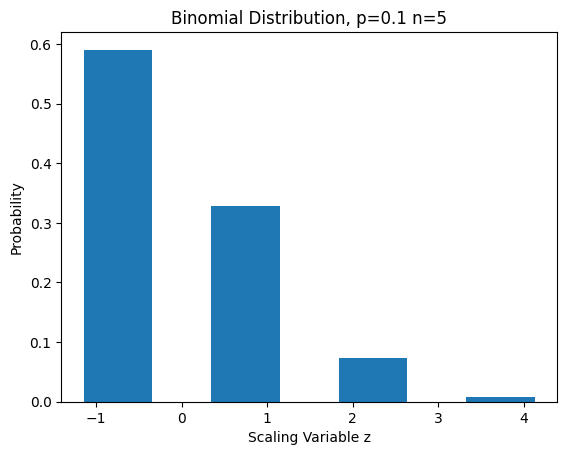

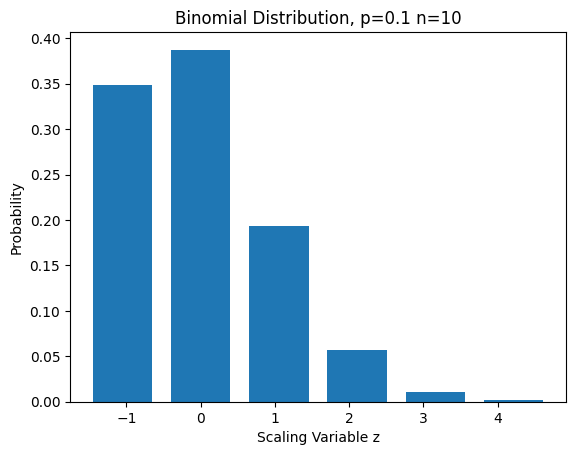

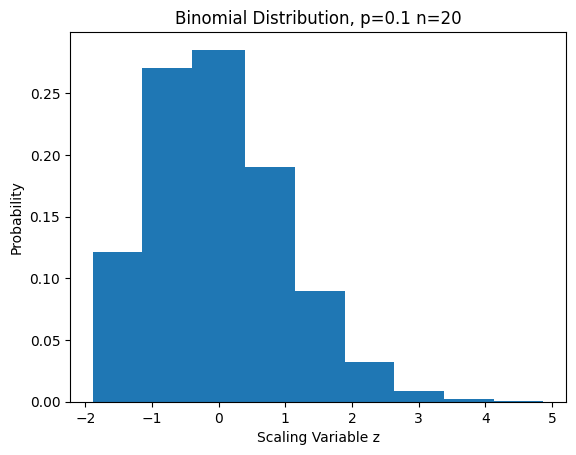

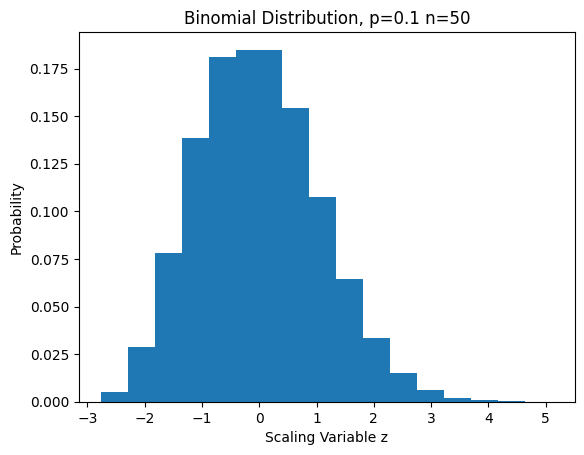

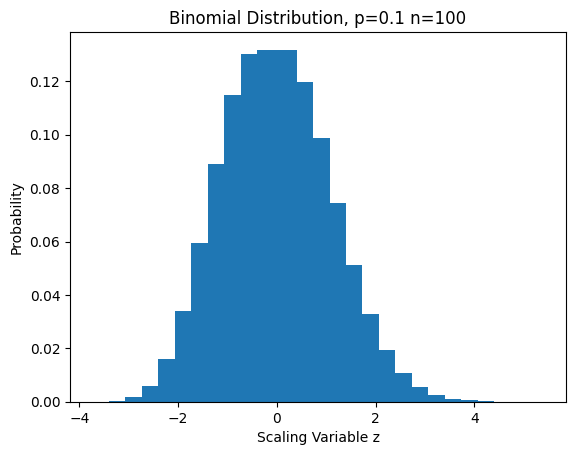

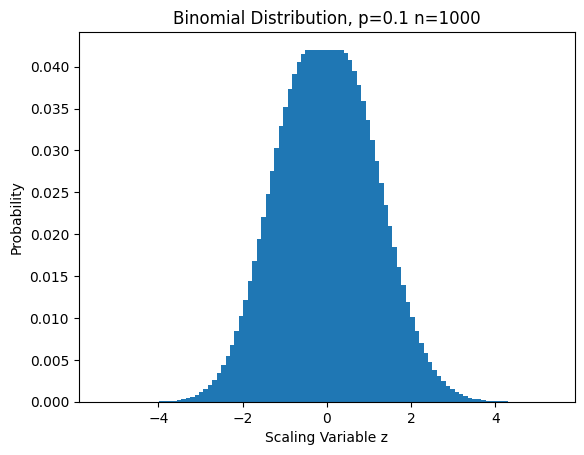

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Function to plot the binomial distribution for a sequence of n values
def plot_binomial_distributions(nlist, p):
    for n in nlist:
        k = np.arange(0, n+1)
        f = binom.pmf(k, n, p)
        plt.bar(k, f)
        plt.xlabel('Number of Successes')
        plt.ylabel('Probability')
        plt.title(f'Binomial Distribution, p={p} n={n}')
        plt.show()

# Function to plot the rescaled binomial distributions
def plot_rescaled_binomial_distributions(nlist, p, zmax):
    for n in nlist:
        k = np.arange(0, n+1)
        z = (k - n*p) / np.sqrt(n*p*(1-p))
        zi = np.abs(z) <= zmax
        f = binom.pmf(k, n, p)
        plt.bar(z[zi], f[zi])
        plt.xlabel('Scaling Variable z')
        plt.ylabel('Probability')
        plt.title(f'Binomial Distribution, p={p} n={n}')
        plt.show()

# Parameters
nlist = [1, 2, 5, 10, 20, 50, 100, 1000]
p = 0.1
zmax = 5

# Plot the binomial distributions
plot_binomial_distributions(nlist, p)

# Plot the rescaled binomial distributions
plot_rescaled_binomial_distributions(nlist, p, zmax)


# Week_2-Introduction_to_Discrete-Time_Stochastic_Processes

## AR(1) Process Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi = 0.8
mu = 0
sigma = 1
n = 100

# Generate white noise
epsilon = np.random.normal(0, sigma, n)

# Initialize the series
X = np.zeros(n)

# Simulate the AR(1) process
for t in range(1, n):
    X[t] = mu + phi * X[t-1] + epsilon[t]

# Plot the series
plt.plot(X)
plt.title('AR(1) Process Simulation')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.show()


```yaml
title: "Testing the Random Walk"
author: "Paul F. Mende"
date: "Summer 2021"
output: 
  html_notebook:
  df_print: paged
  toc: yes
```

Before we get started, let's install a few **packages**.
- The `pip install` command is run **once** to download the software to your computer.
- The `import` command is run **one time per session** in order to load a package's functions and make them available.

In [ ]:
# If you have never installed them, uncomment the lines below and run it one time.

# !pip install yfinance pandas numpy matplotlib


In [4]:
# Now we'll load packages.

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Tootsie Roll

Let's load some data and look at default summary stats for data from Tootsie Roll (TR).

**Technical note:** Data is often exchanged using "flat files," which are plain text files that can be read using a simple text editor.

In [5]:
# Fetch some test data from Yahoo! Finance

# Define query parameters
ticker = "TR"
date_first = "1987-12-31"
date_last = "2017-12-31"

# Get the data
TR = yf.download(ticker, start=date_first, end=date_last)


[*********************100%%**********************]  1 of 1 completed


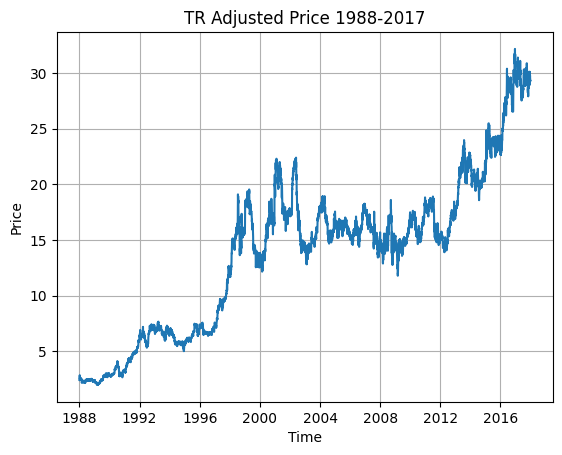

In [6]:
# Here is what the price looks like over time

plt.plot(TR.index, TR['Adj Close'], label='Adjusted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('TR Adjusted Price 1988-2017')
plt.grid(True)
plt.show()


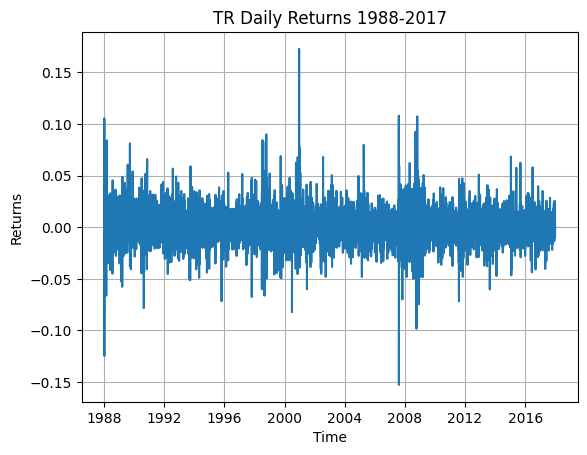

In [7]:
# Compute the returns
P = TR['Adj Close']
r = np.diff(np.log(P))
N = len(r)

# The returns can also be stored as a new column in TR.
TR['r'] = np.append([np.nan], r)

# Trim off the first row, which has return NA
TR = TR.dropna()

plt.plot(TR.index, TR['r'], label='Daily Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('TR Daily Returns 1988-2017')
plt.grid(True)
plt.show()


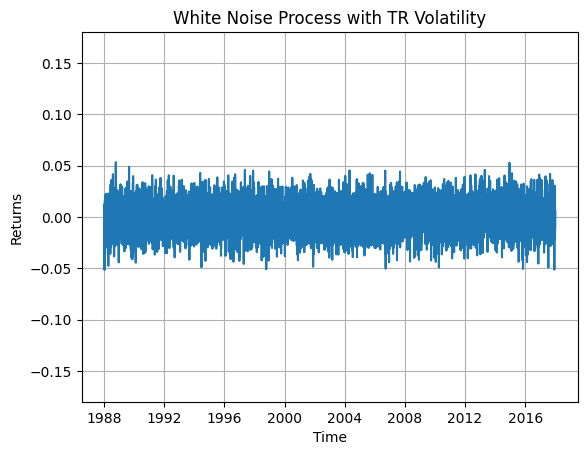

In [8]:
# The daily return series is noisy, and the mean value is barely visible.
# Compare the graph above with the simulation below, in which simulated returns have the same average volatility and zero mean.

plt.plot(TR.index, np.random.normal(scale=np.std(TR['r']), size=len(TR)), label='White Noise')
plt.ylim(-0.18, 0.18)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('White Noise Process with TR Volatility')
plt.grid(True)
plt.show()

# ## Summary statistics and return distribution


In [9]:
# These are high-level summary stats that pandas provides for any data frame.
TR.describe()


,Open,High,Low,Close,Adj Close,Volume,r
count,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7.561000e+03,7561.000000
mean,17.127492,17.291400,16.958349,17.130316,13.937244,1.093418e+05,0.000329
std,7.631720,7.704925,7.551136,7.630722,7.081619,1.369456e+05,0.015260
min,3.198492,3.230160,3.166823,3.166823,2.000310,0.000000e+00,-0.152747
25%,9.500470,9.611309,9.437134,9.500470,6.886582,4.341900e+04,-0.007794
50%,18.863262,19.050213,18.626835,18.855339,15.155957,8.259300e+04,0.000000
75%,22.032621,22.261339,21.846598,22.062941,17.658766,1.373520e+05,0.008097
max,34.504353,34.881218,34.127483,34.797470,32.142105,6.949144e+06,0.172634


In [10]:
# Annualization conventions
# Annualized return = 252 * (Daily return)
# Annualized std. dev. = sqrt(252) * (Daily std. dev)

mean_return_annualized = np.mean(r) * 252
volatility_annualized = np.std(r) * np.sqrt(252)

mean_return_annualized, volatility_annualized


(np.float64(0.08286887656051387), np.float64(0.2422338657650814))

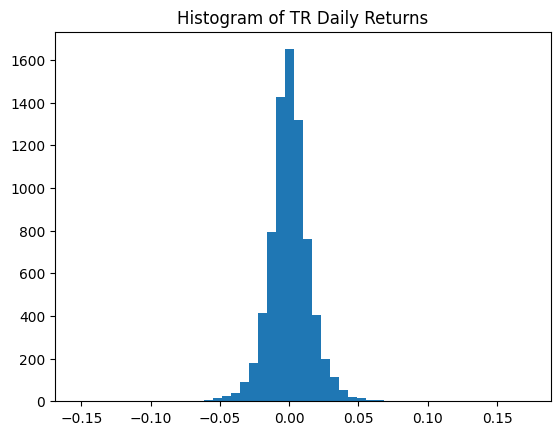

In [11]:
# The histogram of returns has fat tails (and therefore a thin middle).

plt.hist(r, bins=50)
plt.title('Histogram of TR Daily Returns')
plt.show()

# ## Lo & MacKinlay


Following Lo & MacKinlay, we ask whether the measured sample variance of returns grows linearly as a function of the observation interval.

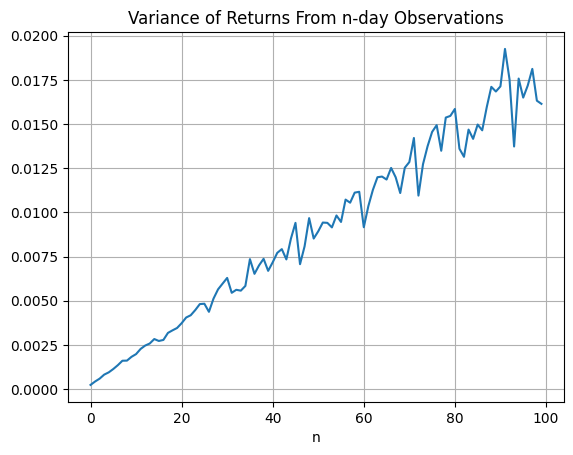

In [12]:
Variance = [np.var(np.diff(np.log(P)))]

for n in range(2, 101):
    Variance.append(np.var(np.diff(np.log(P[::n]))))

plt.plot(Variance)
plt.xlabel('n')
plt.title('Variance of Returns From n-day Observations')
plt.grid(True)
plt.show()

# ## Variance and Ratios


Define functions for $\widehat \sigma^2_c$

/tmp/ipykernel_212443/2240063000.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = (X[-1] - X[0]) / T
/tmp/ipykernel_212443/2240063000.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sumsq = sum((X[t + 1] - X[t - q + 1] - q * mu) ** 2 for t in range(q, T))


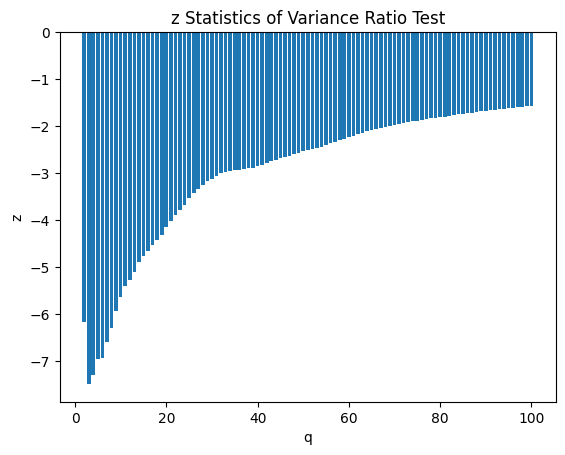

In [13]:
def variance_c(X, q):
    T = len(X) - 1
    mu = (X[-1] - X[0]) / T
    m = (T - q) * (T - q + 1) * q / T
    sumsq = sum((X[t + 1] - X[t - q + 1] - q * mu) ** 2 for t in range(q, T))
    return sumsq / m

def z_stat(X, q):
    T = len(X) - 1
    c = np.sqrt(T * (3 * q) / (2 * (2 * q - 1) * (q - 1)))
    M = variance_c(X, q) / variance_c(X, 1) - 1
    return c * M

Vc = [variance_c(np.log(P), q) for q in range(1, 101)]
zstats = [z_stat(np.log(P), q) for q in range(2, 101)]
pValues = [2 * (1 - np.abs(np.random.normal(0, 1))) for z in zstats]

plt.bar(range(2, 101), zstats)
plt.xlabel('q')
plt.ylabel('z')
plt.title('z Statistics of Variance Ratio Test')
plt.show()

# ## Interpreting the test statistics


The test statistic $z(q)$ was constructed to be normally distributed as ${\cal N}(0,1)$ if the data followed a random walk and scaled accordingly.

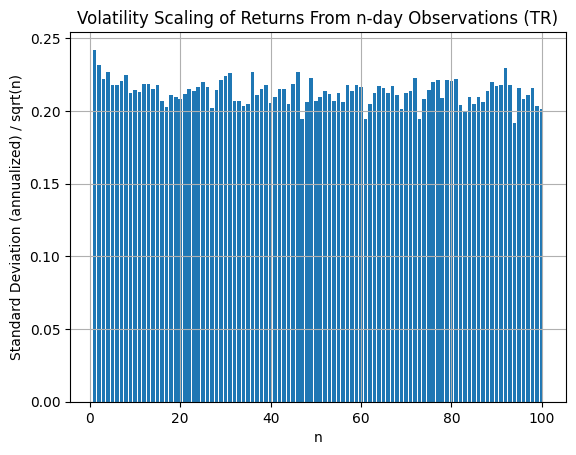

In [14]:
sigma = [np.sqrt(252) * np.std(np.diff(np.log(P)))]
for n in range(2, 101):
    sigma.append(np.sqrt(252 / n) * np.std(np.diff(np.log(P[::n]))))

plt.bar(range(1, 101), sigma)
plt.xlabel('n')
plt.ylabel('Standard Deviation (annualized) / sqrt(n)')
plt.title('Volatility Scaling of Returns From n-day Observations (TR)')
plt.grid(True)
plt.show()


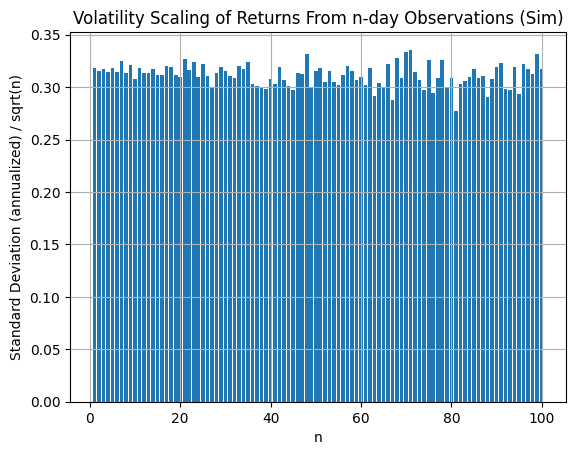

In [15]:
# Simulation of returns with similar volatility

P_MC = np.exp(np.cumsum(np.random.normal(scale=0.02, size=N)))
sigma_MC = [np.sqrt(252) * np.std(np.diff(np.log(P_MC)))]

for n in range(2, 101):
    sigma_MC.append(np.sqrt(252 / n) * np.std(np.diff(np.log(P_MC[::n]))))

plt.bar(range(1, 101), sigma_MC)
plt.xlabel('n')
plt.ylabel('Standard Deviation (annualized) / sqrt(n)')
plt.title('Volatility Scaling of Returns From n-day Observations (Sim)')
plt.grid(True)
plt.show()

